# dependencias 

In [1]:
import igraph as ig
import json

# datos

In [2]:
# leemos el json
with open('../input/graph/Universidad Nacional de Colombia-Bogotá-FACULTAD DE CIENCIAS-Departamento de Estadística.json') as f:
    data = json.load(f)

In [3]:
# nodos
print(len(data['nodes']))
# cantidad de aristas
print(len(data['links']))
# cantiras de options
print(len(data['options']))

364
1134
365


In [ ]:
dat

In [4]:
nodos = data['nodes']
aristas = data['links']

In [5]:
nodos[0]

{'id': '2d4d5a17-7ef0-4fc4-8b25-d1af93445f50',
 'label': 'Departamento de Estadística',
 'type': 'uab'}

In [6]:
nodos[0]

{'id': '2d4d5a17-7ef0-4fc4-8b25-d1af93445f50',
 'label': 'Departamento de Estadística',
 'type': 'uab'}

In [9]:
G = ig.Graph()

In [1]:
for nodo in nodos:
    if nodo['id'] != '2d4d5a17-7ef0-4fc4-8b25-d1af93445f50':
        G.add_vertex(name=str(nodo['id']), label=str(nodo['label']), tipo=str(nodo['type']))

NameError: name 'nodos' is not defined

In [11]:
aristas = [ elem for elem in aristas if elem['source'] != '2d4d5a17-7ef0-4fc4-8b25-d1af93445f50' ]
for arista in aristas:
    G.add_edge(str(arista['source']), str(arista['target']), weight=arista['value'])

In [12]:
nodolabels = G.vs['type']
set(nodolabels)

{'author', 'topic'}

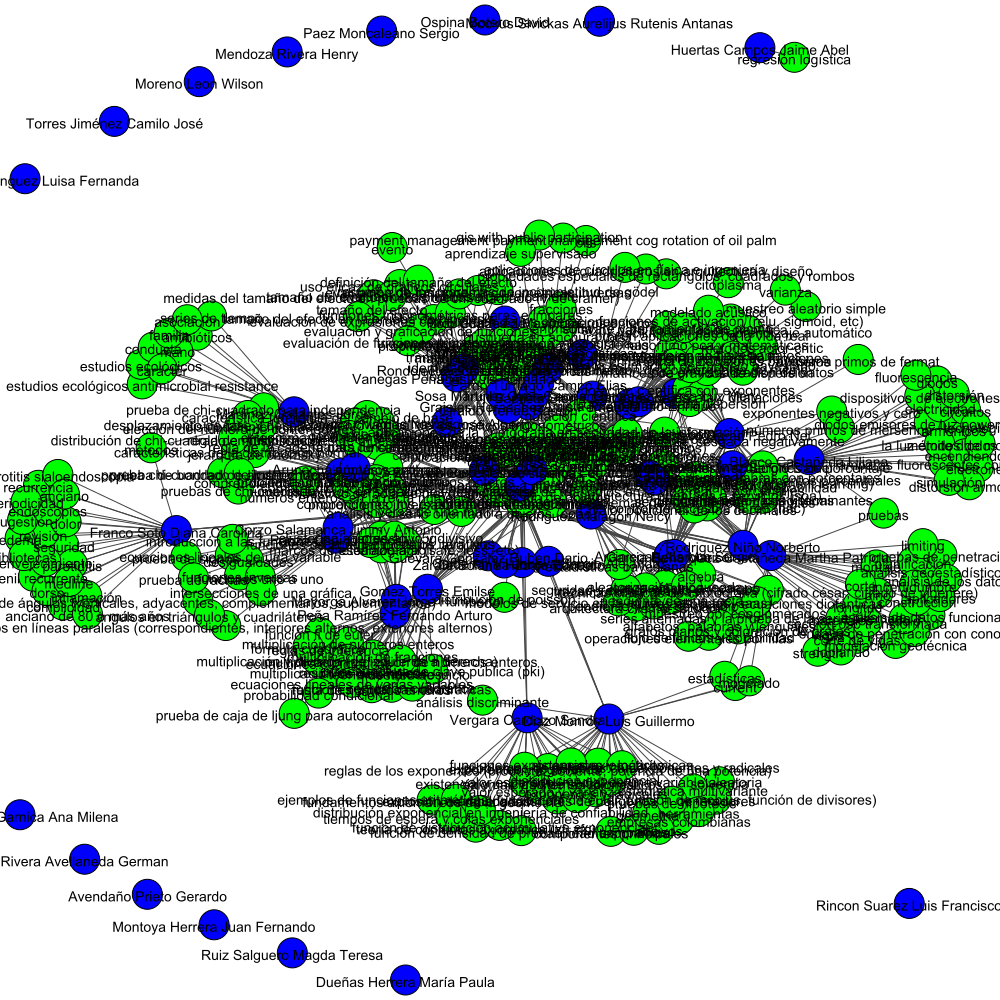

In [13]:
# graficar por colores
layout = G.layout("kk")
visual_style = {
    "vertex_color": [ "blue" if type == "author" else "green" for type in G.vs["type"]],
    "vertex_size": 30,
    "bbox": (1000, 1000),
    "margin": 20
    
}

ig.plot(G, **visual_style)


# dependencias

In [ ]:
import sys 

# tratamiento de datos 


In [8]:
data['nodes'][1]

{'id': 1655, 'label': 'Diaz Monroy Luis Guillermo', 'type': 'author'}

In [9]:
id_nodo = [nodo['id'] for nodo in data['nodes'] if nodo['id'] != '2d4d5a17-7ef0-4fc4-8b25-d1af93445f50']
label_nodo = [nodo['label'] for nodo in data['nodes'] if nodo['id'] != '2d4d5a17-7ef0-4fc4-8b25-d1af93445f50']
type_nodo = [nodo['type'] for nodo in data['nodes'] if nodo['id'] != '2d4d5a17-7ef0-4fc4-8b25-d1af93445f50']

In [10]:
type = [True if type == 'author' else False for type in type_nodo]

In [10]:
# aristas
#aristas = [(arista['source'],arista['target']) for arista in data['links'] if arista['source'] != '2d4d5a17-7ef0-4fc4-8b25-d1af93445f50']

In [11]:
G = ig.Graph()
for nodo in nodos:
    if nodo['id'] != '2d4d5a17-7ef0-4fc4-8b25-d1af93445f50':
        G.add_vertex(name=str(nodo['id']), label=str(nodo['label']), tipo=str(nodo['type']))

aristas = [ elem for elem in aristas if elem['source'] != '2d4d5a17-7ef0-4fc4-8b25-d1af93445f50' ]
for arista in aristas:
    G.add_edge(str(arista['source']), str(arista['target']), weight=arista['value'])

In [12]:
G.vs['type'] = type

In [14]:
# matriz de adyacencia
matriz = G.get_adjacency()
matriz.shape

(363, 363)

In [17]:
ig.as_biadjacency_matrix(G)

AttributeError: module 'igraph' has no attribute 'as_biadjacency_matrix'